In [ ]:
install.packages(c("FactoMineR", "factoextra", "dplyr", "ggplot2"))
library(FactoMineR)
library(factoextra)
library(dplyr)
library(ggplot2)

# Charger les données
data <- read.csv("StudentsPerformance.csv")  # Remplace avec le bon chemin

# Afficher les premières lignes
head(data)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘corrplot’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race.ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental.level.of.education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test.preparation.course    : chr  "none" "completed" "none" "none" ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


   math.score     reading.score    writing.score   
 Min.   :  0.00   Min.   : 17.00   Min.   : 10.00  
 1st Qu.: 57.00   1st Qu.: 59.00   1st Qu.: 57.75  
 Median : 66.00   Median : 70.00   Median : 69.00  
 Mean   : 66.09   Mean   : 69.17   Mean   : 68.05  
 3rd Qu.: 77.00   3rd Qu.: 79.00   3rd Qu.: 79.00  
 Max.   :100.00   Max.   :100.00   Max.   :100.00  

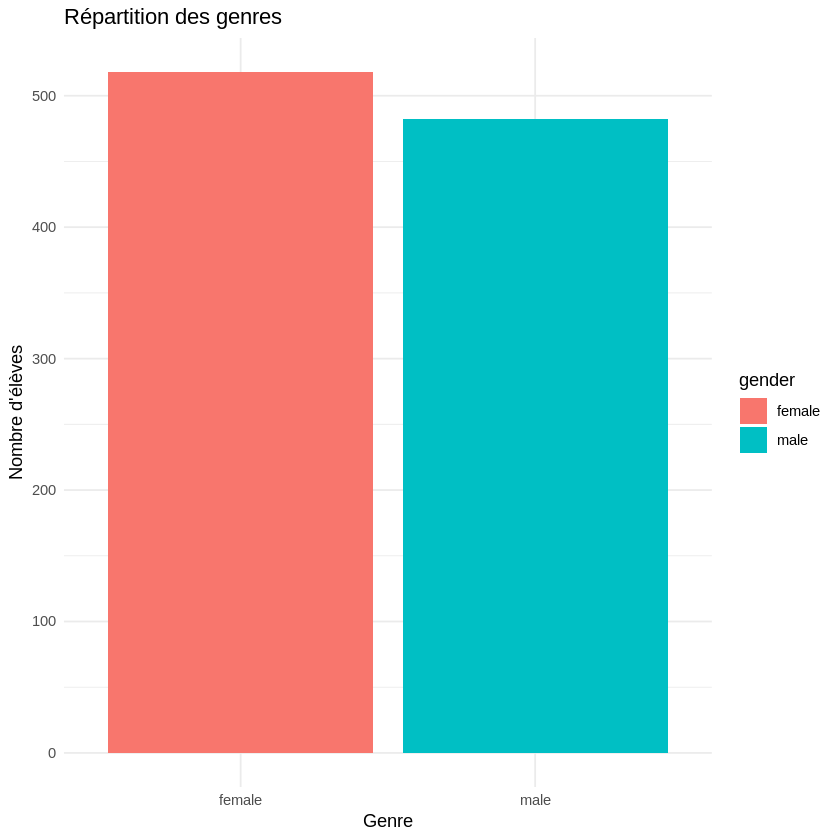

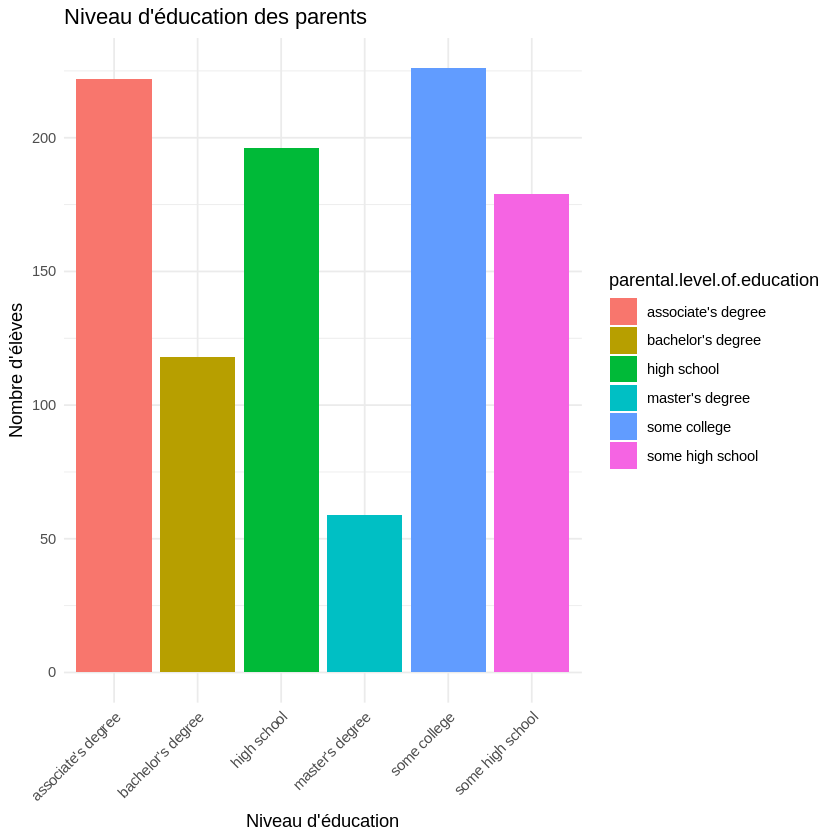

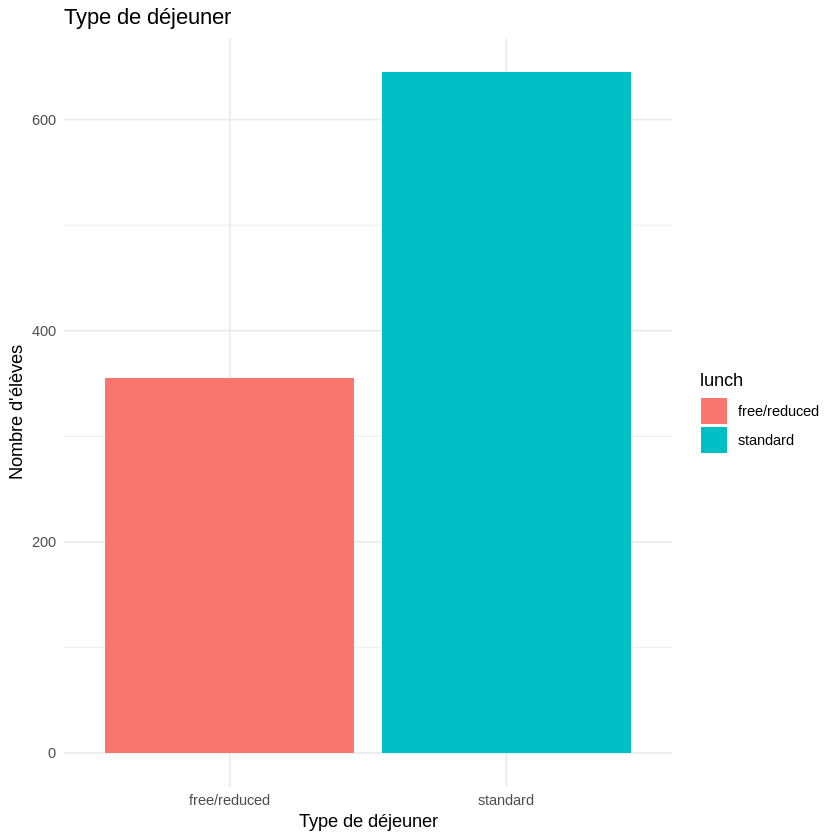

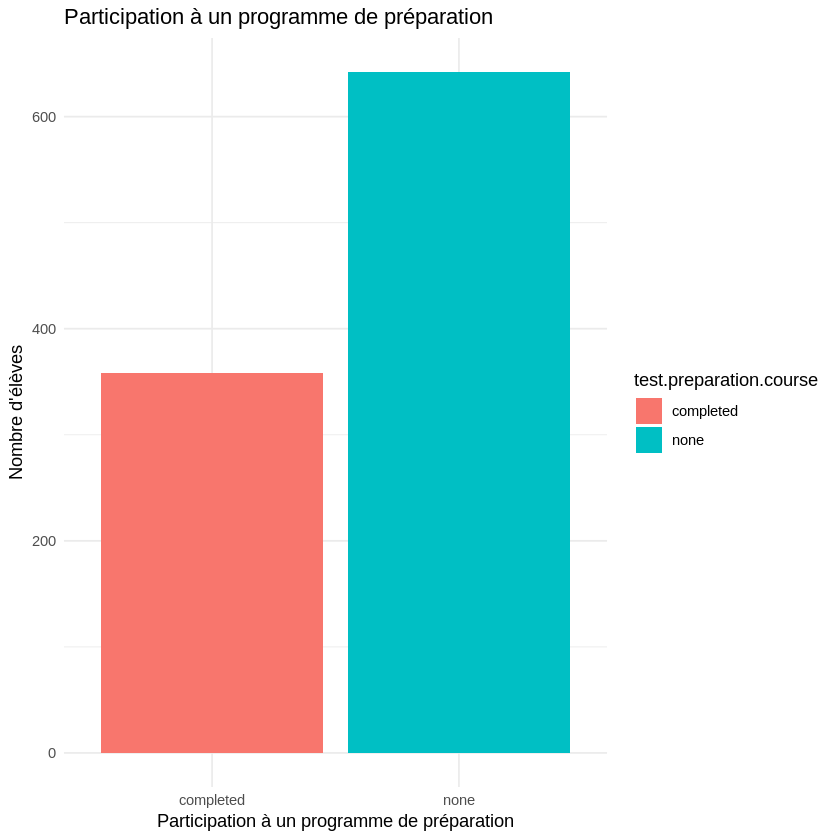

In [ ]:

# Vérifier les types de variables
str(data)

# Statistiques descriptives des variables quantitatives
summary(select(data, math.score, reading.score, writing.score))

# Graphique pour la variable "gender"
ggplot(data, aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Répartition des genres", x = "Genre", y = "Nombre d'élèves") +
  theme_minimal()

# Graphique pour "parental.level.of.education"
ggplot(data, aes(x = parental.level.of.education, fill = parental.level.of.education)) +
  geom_bar() +
  labs(title = "Niveau d'éducation des parents", x = "Niveau d'éducation", y = "Nombre d'élèves") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotation pour une meilleure lisibilité

# Graphique pour "lunch"
ggplot(data, aes(x = lunch, fill = lunch)) +
  geom_bar() +
  labs(title = "Type de déjeuner", x = "Type de déjeuner", y = "Nombre d'élèves") +
  theme_minimal()
# Graphique pour "test.preparation.course"
ggplot(data, aes(x = test.preparation.course, fill = test.preparation.course)) +
  geom_bar() +
  labs(title = "Participation à un programme de préparation", x = "Participation à un programme de préparation", y = "Nombre d'élèves") +
  theme_minimal()


In [ ]:
# Vérification des valeurs manquantes
sum(is.na(data))

# Normalisation des variables quantitatives
data_scaled <- data
data_scaled$math.score <- scale(data$math.score)
data_scaled$reading.score <- scale(data$reading.score)
data_scaled$writing.score <- scale(data$writing.score)

# Transformer les variables qualitatives en facteurs
data_scaled$gender <- as.factor(data_scaled$gender)
data_scaled$parental.level.of.education <- as.factor(data_scaled$parental.level.of.education)
data_scaled$lunch <- as.factor(data_scaled$lunch)


[1] 0

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 1000 individuals, described by 3 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

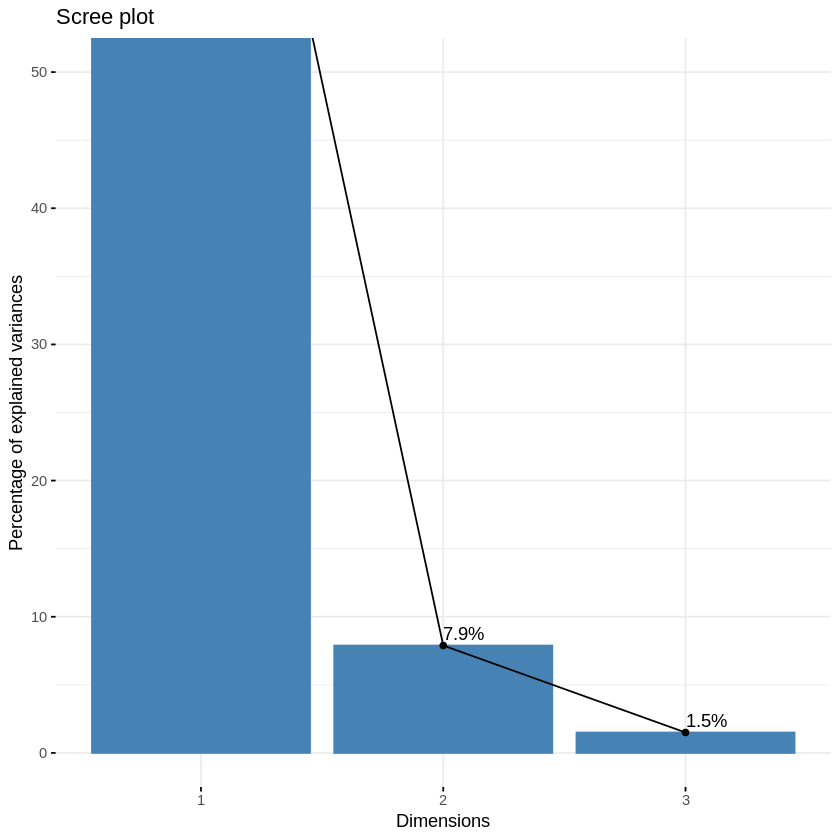

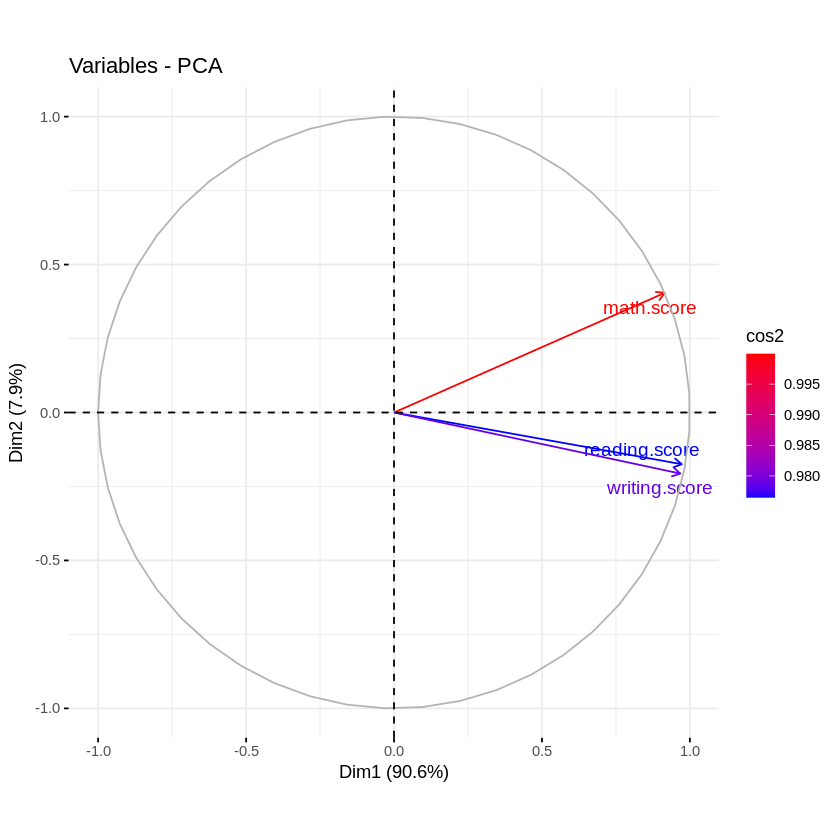

                 Dim.1    Dim.2      Dim.3
math.score    30.77197 69.07264  0.1553848
reading.score 34.79639 12.91887 52.2847383
writing.score 34.43163 18.00849 47.5598769


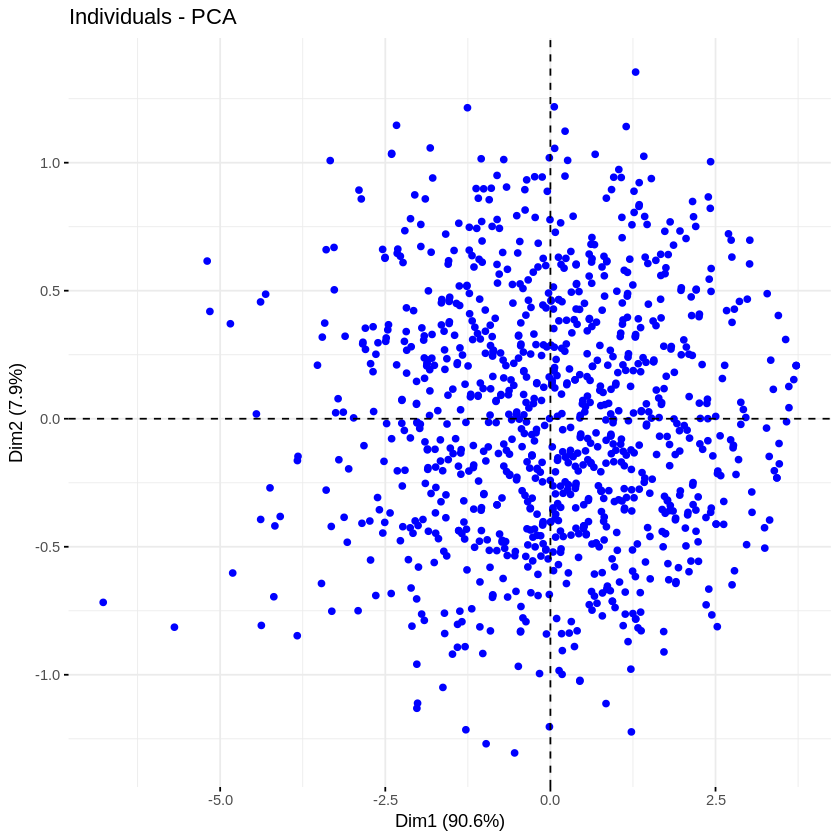

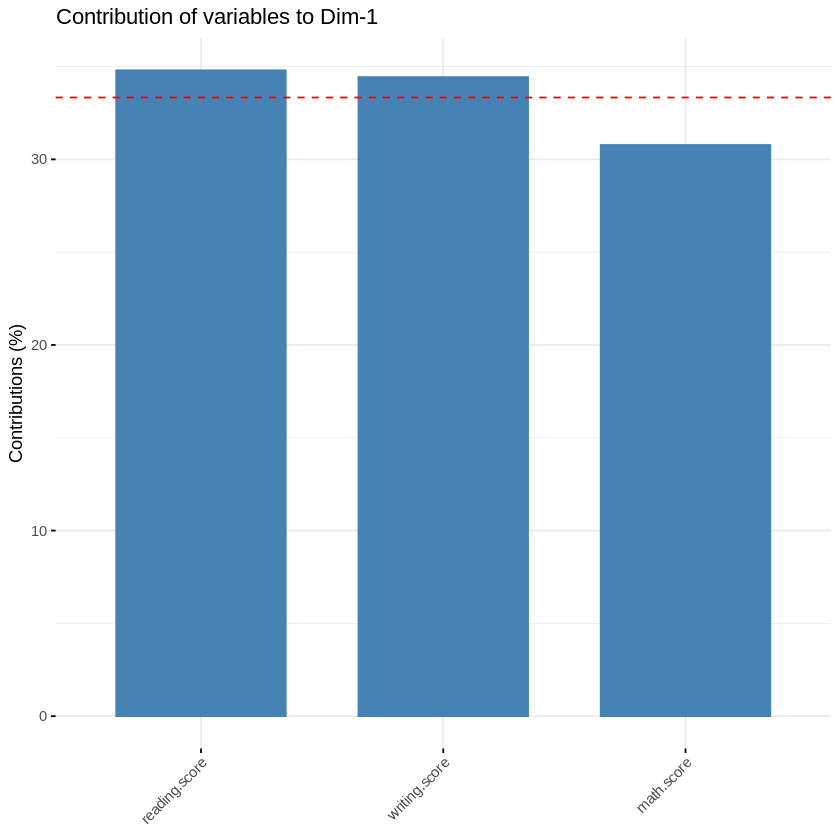

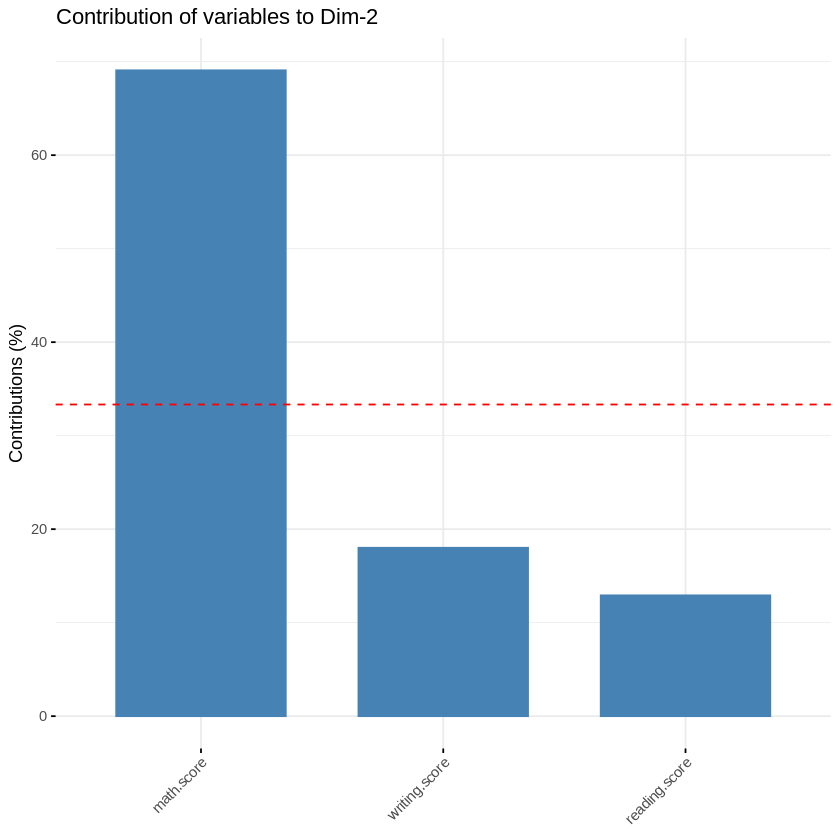

In [ ]:
# Sélectionner les variables quantitatives
data_quant <- select(data_scaled, math.score, reading.score, writing.score)

# Réaliser l'ACP
res.pca <- PCA(data_quant, scale.unit = TRUE, graph = FALSE)
# Afficher les résultats de l'ACP
print(res.pca)

# Visualisation des valeurs propres (pourcentage de variance expliquée)
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

# Visualisation des variables dans le plan factoriel
fviz_pca_var(res.pca, col.var = "cos2", gradient.cols = c("blue", "red"), repel = TRUE)

# Visualisation des individus dans le plan factoriel
fviz_pca_ind(res.pca, repel = TRUE, geom = "point", col.ind = "blue")
# Extraire les contributions des variables aux axes
contributions_var <- res.pca$var$contrib

# Afficher les contributions des variables aux axes
print(contributions_var)

# Visualiser les contributions des variables aux axes (graphique en barres)
fviz_contrib(res.pca, choice = "var", axes = 1, top = 4)  # Contributions à l'axe 1
fviz_contrib(res.pca, choice = "var", axes = 2, top = 4)  # Contributions à l'axe 2

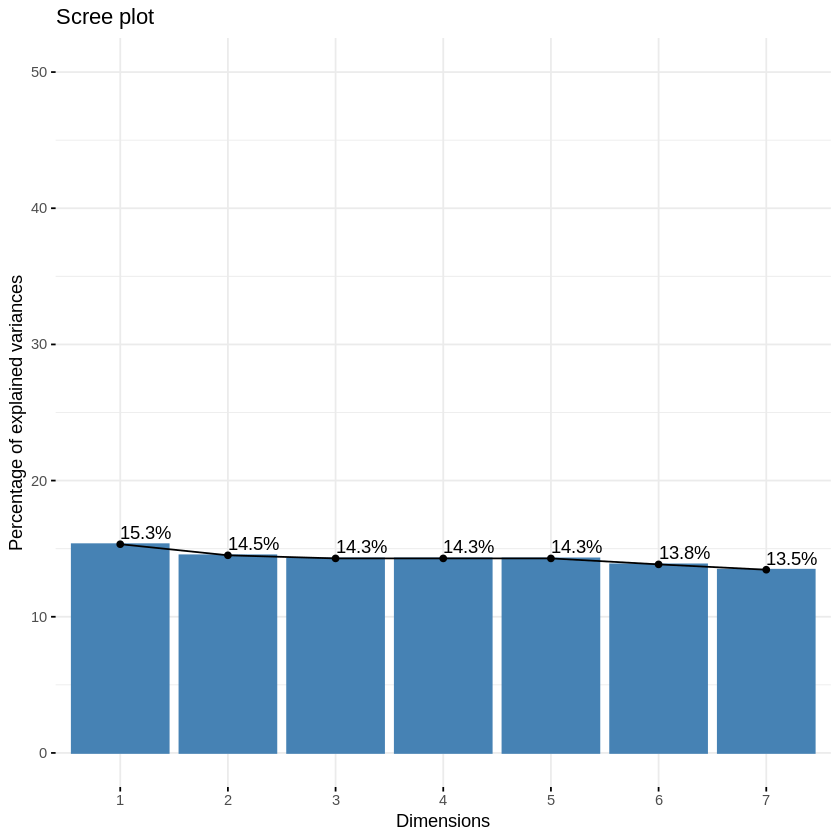

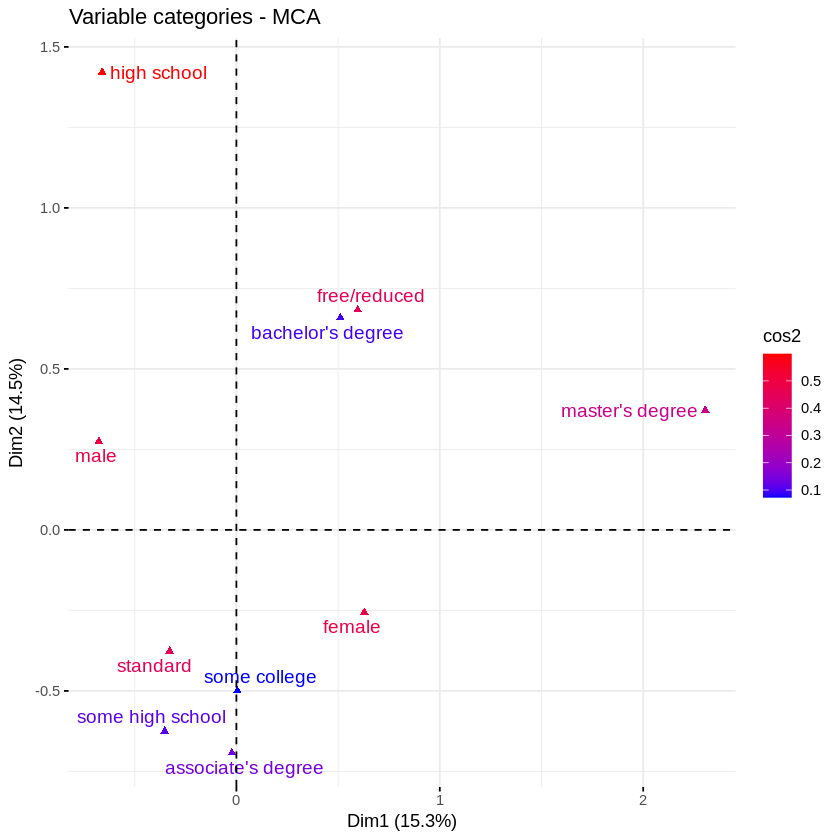

                          Dim 1      Dim 2        Dim 3        Dim 4
female             1.910561e+01  3.3403679 3.298720e-38 0.000000e+00
male               2.053259e+01  3.5898560 1.560376e-31 3.707054e-30
associate's degree 1.038761e-02 10.4838310 5.259453e+01 1.636769e+00
bachelor's degree  2.871655e+00  5.0462445 1.220101e+00 4.948291e+01
high school        7.955997e+00 39.0030215 1.076436e+00 6.562306e+00
master's degree    2.921503e+01  0.8036472 4.939167e-01 5.636424e+00
some college       4.874062e-04  5.5430426 4.290156e+01 1.718695e+01
some high school   2.070122e+00  6.8764939 1.713451e+00 1.949463e+01
free/reduced       1.176359e+01 16.3272045 2.115393e-26 1.465571e-26
standard           6.474533e+00  8.9862909 1.171811e-26 8.021732e-27
                          Dim 5
female             4.276424e-48
male               1.789626e-30
associate's degree 7.824473e+00
bachelor's degree  2.178895e+01
high school        1.773919e+00
master's degree    1.514453e+01
some college     

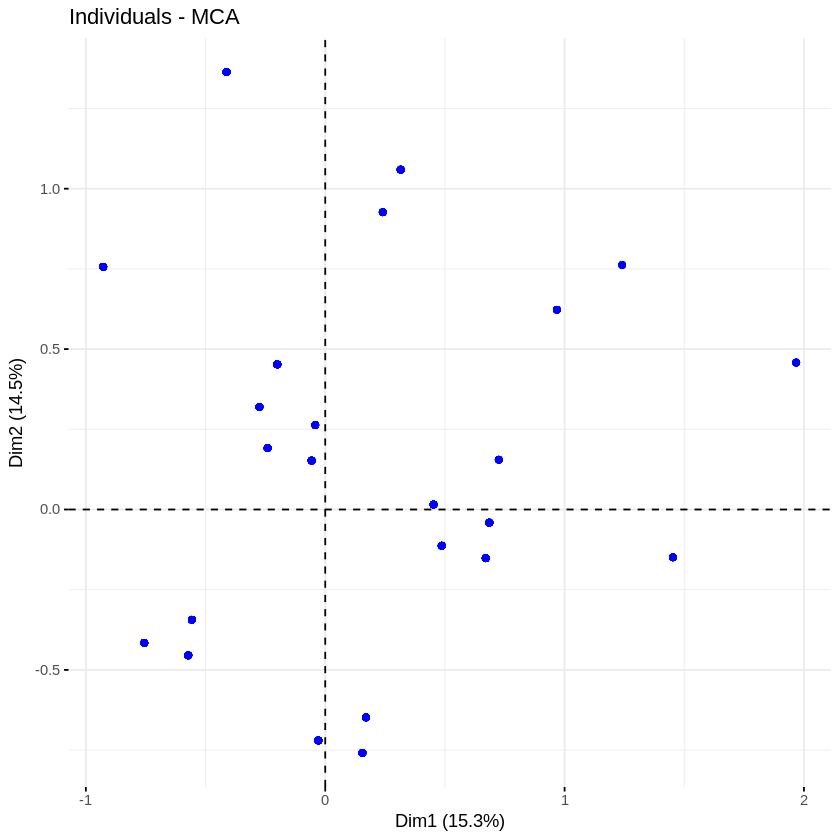

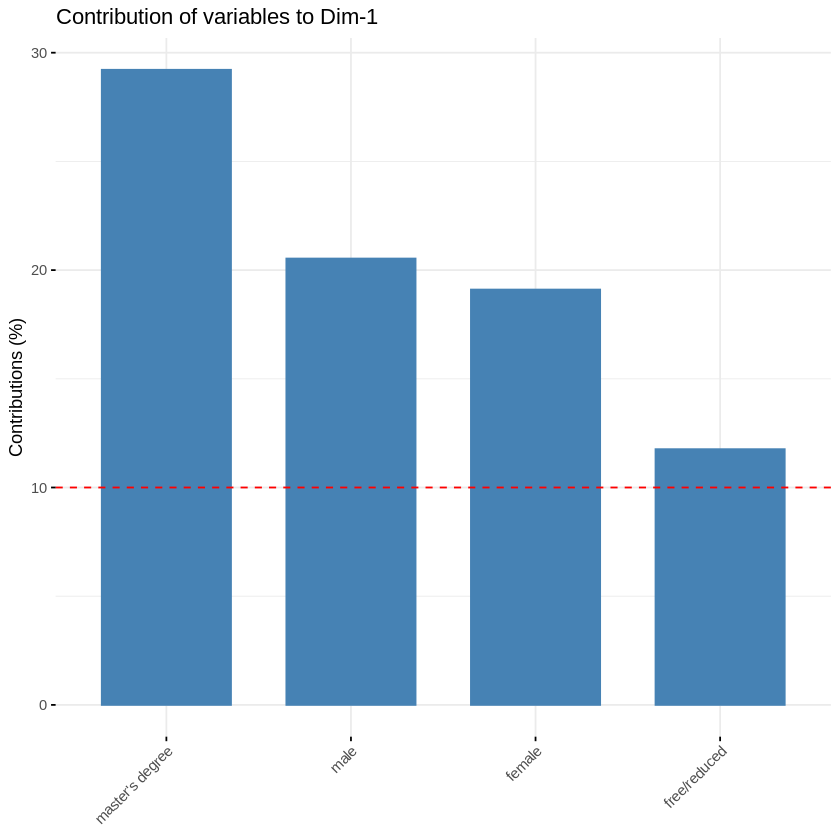

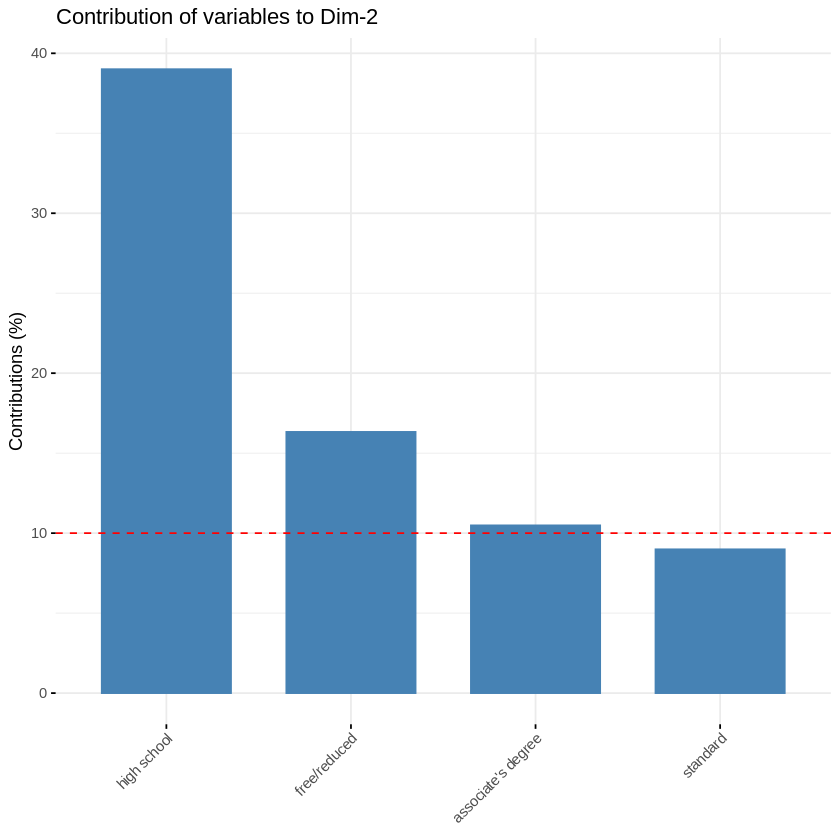

In [ ]:
# Sélectionner les variables qualitatives
data_qual <- select(data_scaled, gender, parental.level.of.education, lunch)

# Réaliser l'AFCM
afcm_result <- MCA(data_qual, graph = FALSE)

# Visualisation des valeurs propres (pourcentage de variance expliquée)
fviz_eig(afcm_result, addlabels = TRUE, ylim = c(0, 50))

# Visualisation des variables dans le plan factoriel
fviz_mca_var(afcm_result, col.var = "cos2", gradient.cols = c("blue", "red"), repel = TRUE)

# Visualisation des individus dans le plan factoriel
fviz_mca_ind(afcm_result, repel = FALSE, geom = "point", col.ind = "blue")

# Extraire les contributions des variables aux axes
contributions_var <- afcm_result$var$contrib

# Afficher les contributions des variables aux axes
print(contributions_var)

# Visualiser les contributions des variables aux axes (graphique en barres)
fviz_contrib(afcm_result, choice = "var", axes = 1, top = 4)  # Contributions à l'axe 1
fviz_contrib(afcm_result, choice = "var", axes = 2, top = 4)  # Contributions à l'axe 2